In [5]:
import pandas as pd

basics = pd.read_csv("title.basics.tsv", sep="\t", low_memory=False)

ratings = pd.read_csv("title.ratings.tsv", sep="\t", low_memory=False)

In [4]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short


In [6]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2170
1,tt0000002,5.5,298
2,tt0000003,6.5,2233
3,tt0000004,5.2,192
4,tt0000005,6.2,2975


In [7]:
movies = basics[basics['titleType'] == 'movie']

In [8]:
movies = movies[['tconst', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres']]
movies = movies.dropna()

In [9]:
movies = movies.merge(ratings, on='tconst', how='inner')

In [10]:
movies.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,45,Romance,5.4,228
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,100,"Documentary,News,Sport",5.2,564
2,tt0000502,Bohemios,1905,100,\N,3.6,22
3,tt0000574,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,1016
4,tt0000591,The Prodigal Son,1907,90,Drama,5.3,34


In [11]:
movies['main_genre'] = movies['genres'].apply(lambda x: x.split(",")[0])

In [12]:
movies['startYear'] = pd.to_numeric(movies['startYear'], errors='coerce')
movies['runtimeMinutes'] = pd.to_numeric(movies['runtimeMinutes'], errors='coerce')

In [13]:
movies = movies.dropna()

In [14]:
movies[['primaryTitle', 'main_genre', 'startYear', 'runtimeMinutes', 'averageRating', 'numVotes']].head()

,primaryTitle,main_genre,startYear,runtimeMinutes,averageRating,numVotes
0,Miss Jerry,Romance,1894.0,45.0,5.4,228
1,The Corbett-Fitzsimmons Fight,Documentary,1897.0,100.0,5.2,564
2,Bohemios,\N,1905.0,100.0,3.6,22
3,The Story of the Kelly Gang,Action,1906.0,70.0,6.0,1016
4,The Prodigal Son,Drama,1907.0,90.0,5.3,34


In [15]:
X = movies[['startYear', 'runtimeMinutes', 'averageRating', 'numVotes']]
y = movies['main_genre']

In [17]:
from sklearn.model_selection import train_test_split

# Remove classes with fewer than 2 samples
genre_counts = y.value_counts()
valid_genres = genre_counts[genre_counts >= 2].index
X_filtered = X[y.isin(valid_genres)]
y_filtered = y[y.isin(valid_genres)]

X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered
)

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy: 0.34693979349217696


C:\Users\apran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\apran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\apran\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Classification Report:
               precision    recall  f1-score   support

      Action       0.26      0.20      0.23      6115
       Adult       0.43      0.41      0.42       765
   Adventure       0.12      0.04      0.06      2427
   Animation       0.09      0.02      0.03       564
   Biography       0.11      0.03      0.05      1836
      Comedy       0.31      0.35      0.33     12719
       Crime       0.13      0.04      0.07      2977
 Documentary       0.48      0.61      0.54      8375
       Drama       0.37      0.51      0.43     17282
      Family       0.01      0.00      0.00       405
     Fantasy       0.02      0.00      0.01       318
   Film-Noir       0.00      0.00      0.00         3
     History       0.00      0.00      0.00        84
      Horror       0.26      0.22      0.23      2515
       Music       0.07      0.01      0.02       142
     Musical       0.03      0.00      0.01       209
     Mystery       0.02      0.00      0.01       297
   

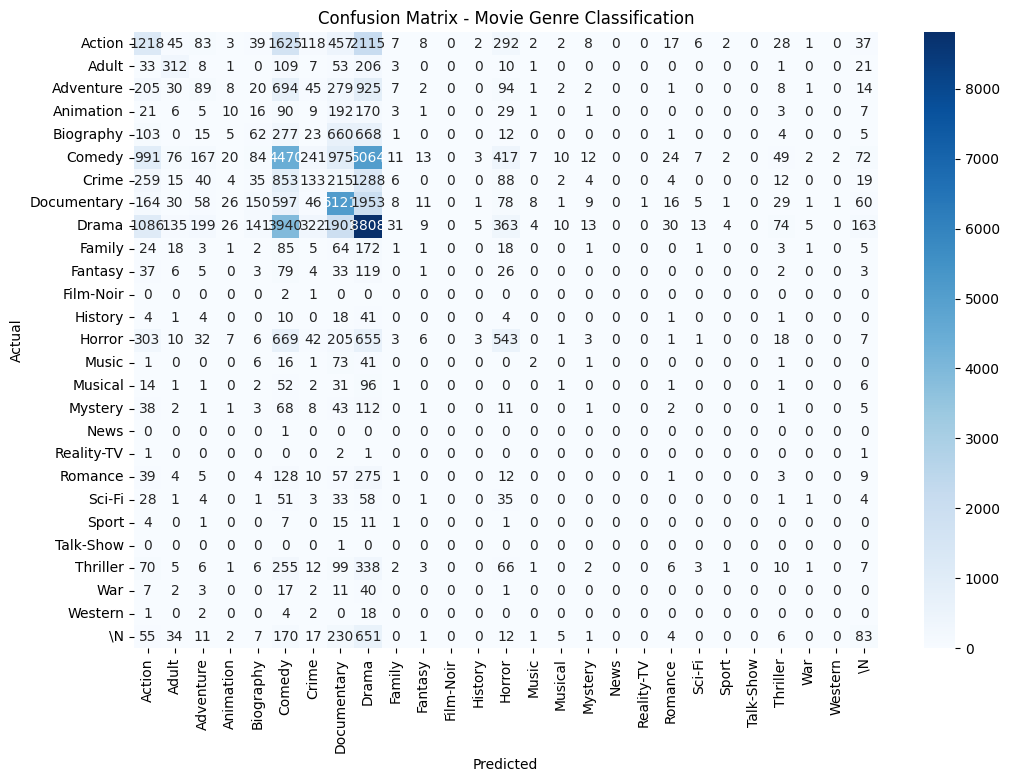

In [19]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Movie Genre Classification")
plt.show()

In [20]:
# Example: Predict genres based on metadata
sample_movies = [
    [2022, 150, 8.5, 500000],  # Recent long, high-rated movie
    [1995, 90, 6.2, 20000],    # Old short movie with average rating
    [2010, 120, 7.0, 150000]   # Modern typical runtime + rating
]

predictions = model.predict(sample_movies)
print(predictions)

C:\Users\apran\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


['Action' 'Comedy' 'Drama']
